In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
from utils import build_dhaka_df, build_karachi_df, build_DiD_graph, build_DiD_model, build_monthly_df

In [2]:
karachi_df = pd.read_csv("../data/karachi/PAQI/PAQI_Karachi.csv")
karachi_df = karachi_df.rename(columns={'PM2.5 (μg/m3)': 'AQI'})
karachi_df = karachi_df.rename(columns={'Datetime (UTC+5)': 'Date (LT)'})
sensor_list = ['Quaidabadk', 'Korangi no 4', 'Korangi Creek']
#karachi_df = karachi_df[karachi_df['Name'].isin(sensor_list)]

In [3]:
dhaka_df = build_dhaka_df(["2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023", "2024", "2025"])

In [4]:
monthly_karachi_df = build_monthly_df(karachi_df)
monthly_dhaka_df = build_monthly_df(dhaka_df)
monthly_karachi_df["AQI"] = monthly_karachi_df['AQI'].interpolate()
monthly_dhaka_df["AQI"] = monthly_dhaka_df['AQI'].interpolate()

/home/saahas/Downloads/GitHub/PUBP-3042-Code/Final/models/utils.py:102: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df['AQI'].resample('M').mean()
/home/saahas/Downloads/GitHub/PUBP-3042-Code/Final/models/utils.py:102: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df['AQI'].resample('M').mean()


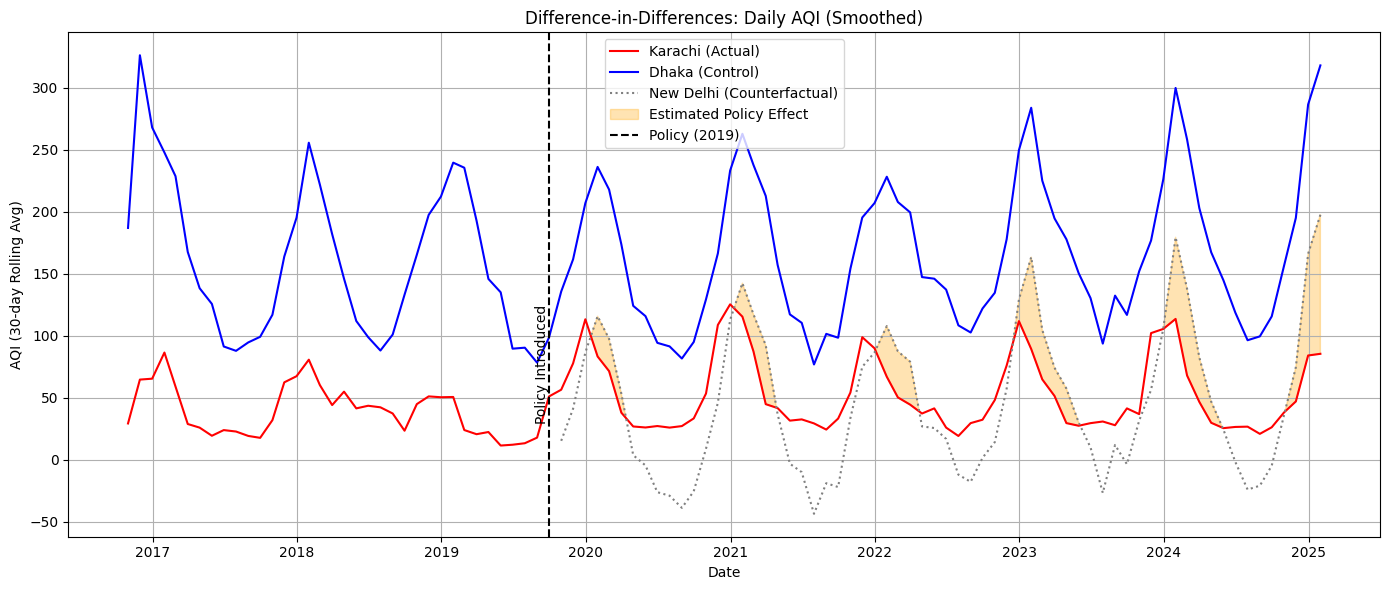

In [5]:
model = build_DiD_graph(monthly_karachi_df, monthly_dhaka_df, "timestamp", "karachi_did.png")
model